In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
model_size = pd.read_csv('benchmark_results_model_size.csv')
image_size = pd.read_csv('benchmark_results_image_size.csv')
macs = pd.read_csv('benchmark_results_macs.csv')

In [236]:
merged_df  = pd.concat([model_size, image_size])
merged_df = pd.merge(merged_df, macs, on='model', how='outer')

In [237]:
# drop bad columns
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [233]:
merged_df

,Unnamed: 0_x,model,wv_test_score,vww_test_score,distance-near,distance-mid,distance-far,miap-female,miap-male,miap-unknown-gender,...,miap-unknown-age,lighting-dark,lighting-normal_light,lighting-bright,hands,feet,depictions_persons,depictions_non_persons,non_person_no_depictions,macs
0,0,wv_small_mobilenetv2_0.1,0.882980,0.878259,0.746239,0.704632,0.616531,0.931714,0.920124,0.771107,...,0.722046,0.869813,0.872199,0.849047,0.451978,0.334645,0.816389,0.890970,0.894372,25382208
1,1,wv_small_mobilenetv2_0.25,0.886529,0.885320,0.750479,0.708523,0.623482,0.940007,0.927571,0.781281,...,0.736045,0.883176,0.874035,0.848383,0.436412,0.294801,0.831509,0.897695,0.897395,35923872
2,2,wv_small_mobilenetv2_0.35,0.896513,0.896060,0.760727,0.724374,0.639738,0.947140,0.935738,0.796178,...,0.749258,0.889526,0.887227,0.857030,0.467994,0.448797,0.833199,0.903516,0.906074,58008368
3,3,wv_small_mobilenetv2_0.5,0.897722,0.901220,0.764619,0.729172,0.648773,0.949148,0.938513,0.794951,...,0.746258,0.892190,0.888509,0.859403,0.428156,0.337393,0.839227,0.903873,0.907408,95854400
4,4,wv_small_mobilenetv2_1.0,0.904021,0.908602,0.771914,0.739510,0.660799,0.959689,0.946302,0.805028,...,0.755436,0.898148,0.896408,0.865272,0.414826,0.377142,0.844626,0.912944,0.912642,299496832
5,5,wv_small_mobilenetv2_1.5,0.908018,0.911614,0.776859,0.747043,0.670924,0.962689,0.953902,0.811407,...,0.762260,0.903298,0.900827,0.871726,0.443145,0.450742,0.855220,0.916249,0.916086,670916544
6,0,wv_small_mobilenetv2_224,0.886256,0.884456,0.752811,0.710045,0.629124,0.937129,0.926823,0.782274,...,0.736282,0.880219,0.874527,0.846753,0.415972,0.252057,0.842195,0.893487,0.897321,35923872
7,2,wv_small_mobilenetv2_192,0.880149,0.882110,0.747555,0.703005,0.616293,0.933350,0.918047,0.772454,...,0.721922,0.873840,0.866930,0.840545,0.460517,0.251125,0.811080,0.888577,0.892142,26393728
8,4,wv_small_mobilenetv2_160,0.870879,0.873050,0.738988,0.696431,0.601039,0.925558,0.905431,0.763864,...,0.718312,0.862390,0.856707,0.825646,0.465732,0.333153,0.805501,0.874353,0.884366,18329760
9,6,wv_small_mobilenetv2_128,0.854462,0.862359,0.724107,0.667302,0.572181,0.912729,0.886961,0.738253,...,0.686536,0.841410,0.834790,0.815793,0.394734,0.204661,0.783697,0.862792,0.871149,11731968


In [238]:
merged_df['model'] = merged_df['model'].str.replace('wv_small_mobilenetv2_', '')


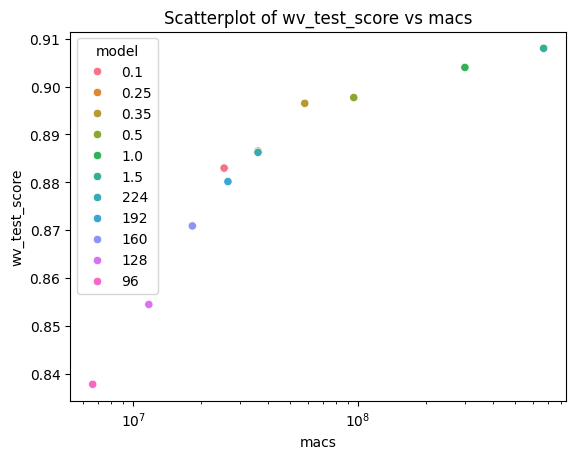

In [241]:
import seaborn as sns
target_metric = 'wv_test_score'
x_metric = 'macs'

import matplotlib.pyplot as plt

sns.scatterplot(data=merged_df, x=x_metric, y=target_metric, hue='model')
plt.xlabel(x_metric)
plt.ylabel(target_metric)
plt.xscale('log')
plt.title('Scatterplot of ' + target_metric + ' vs ' + x_metric)
plt.show()


(0.6, 0.8)

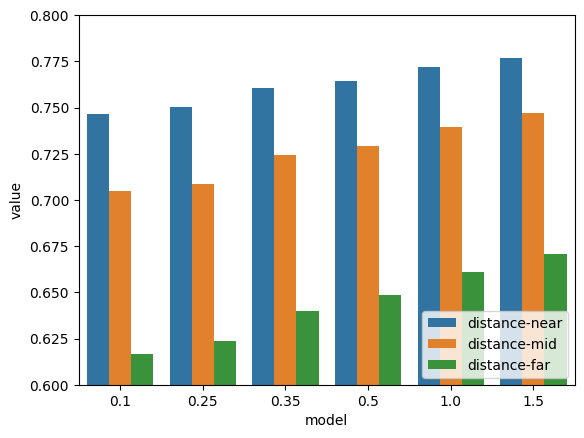

In [46]:
g = sns.barplot(
    data=model_size.melt(id_vars = ["model"], value_vars=["distance-near", "distance-mid", "distance-far"]),
    y="value", x="model", hue="variable", errorbar=None
)
plt.legend(loc='lower right')
plt.ylim(0.6, 0.8)

(0.85, 0.95)

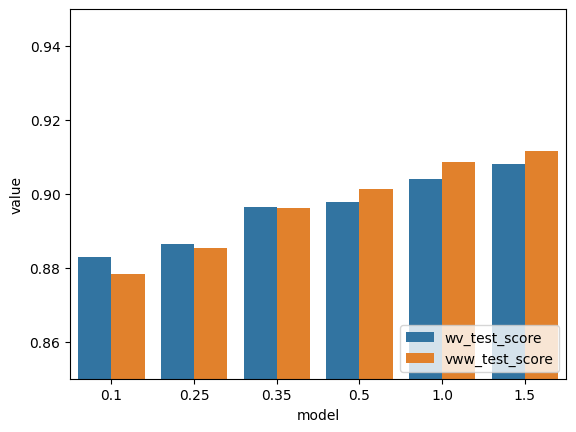

In [52]:
g = sns.barplot(
    data=model_size.melt(id_vars = ["model"], value_vars=["wv_test_score", "vww_test_score"]),
    y="value", x="model", hue="variable", errorbar=None
)
plt.legend(loc='lower right')
plt.ylim(0.85, .95)

(0.75, 1.0)

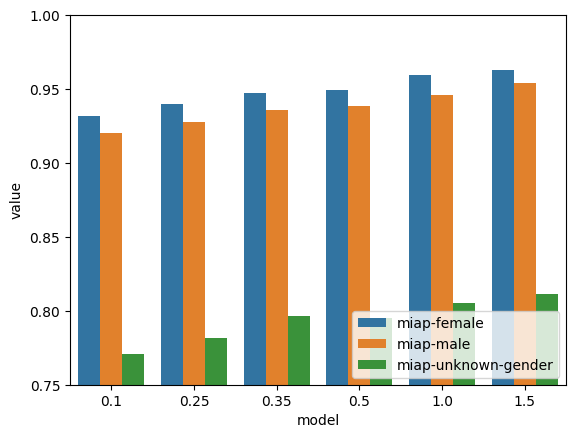

In [23]:
g = sns.barplot(
    data=model_size.melt(id_vars = ["model"], value_vars=["miap-female", "miap-male", "miap-unknown-gender"]),
    y="value", x="model", hue="variable", errorbar=None
)
plt.legend(loc='lower right')
plt.ylim(0.75, 1.0)

(0.5, 0.8)

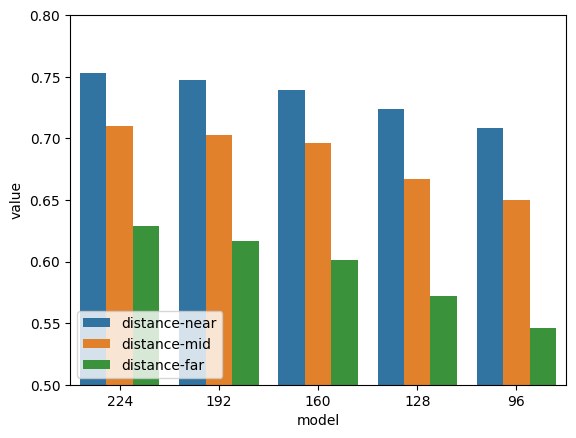

In [49]:
g = sns.barplot(
    data=image_size.melt(id_vars = ["model"], value_vars=["distance-near", "distance-mid", "distance-far"]),
    y="value", x="model", hue="variable", errorbar=None
)
plt.legend(loc='lower left')
plt.ylim(0.5, 0.8)

(0.7, 1.0)

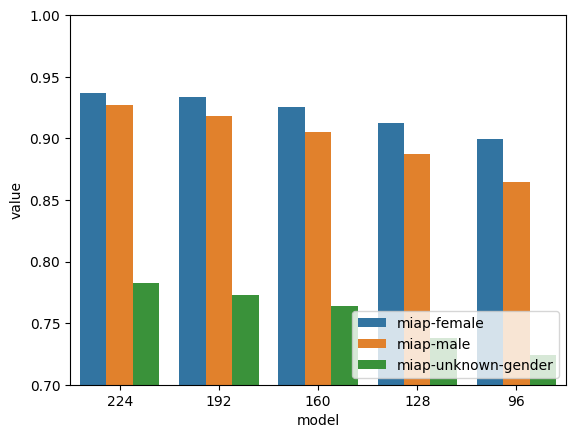

In [119]:
g = sns.barplot(
    data=image_size.melt(id_vars = ["model"], value_vars=["miap-female", "miap-male", "miap-unknown-gender"]),
    y="value", x="model", hue="variable", errorbar=None
)
plt.legend(loc='lower right')
plt.ylim(0.7, 1.0)

(0.82, 0.9)

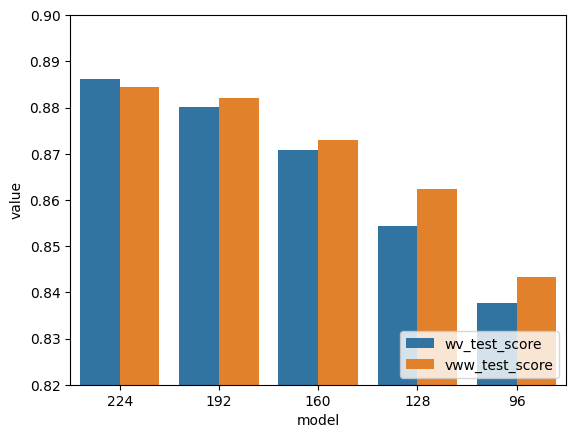

In [55]:
g = sns.barplot(
    data=image_size.melt(id_vars = ["model"], value_vars=["wv_test_score", "vww_test_score"]),
    y="value", x="model", hue="variable", errorbar=None
)
plt.legend(loc='lower right')
plt.ylim(0.82, .9)

In [105]:
model_size = pd.read_csv('benchmark_results_model_size.csv')

In [106]:
model_size['model'] = model_size['model'].str.replace('wv_small_mobilenetv2_', '')

In [107]:
categories = list(model_size.columns[2:-1])
categories.remove("hands")
categories.remove("feet")

In [112]:
model_size[categories]=(model_size[categories]-model_size[categories].mean())/model_size[categories].std()

In [113]:
import plotly.graph_objects as go


fig = go.Figure()

for i, row in model_size.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[categories],
        theta=categories,
        # fill='toself',
        name=row['model']
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[model_size[categories].min(numeric_only=True).min()-0.2, model_size[categories].max(numeric_only=True).max()]
    )),
  showlegend=False
)


fig.show()

In [116]:
fig = go.Figure()
for col in categories:
    fig.add_trace(go.Scatterpolar(
        r=model_size[col],
        theta=model_size['model'],
        # fill='toself',
        name=col
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=False
)


fig.show()